0.6153846153846154
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.00      0.00      0.00         3

    accuracy                           0.62        13
   macro avg       0.36      0.40      0.38        13
weighted avg       0.56      0.62      0.59        13

0.29999999999999993
0.1584175084175084


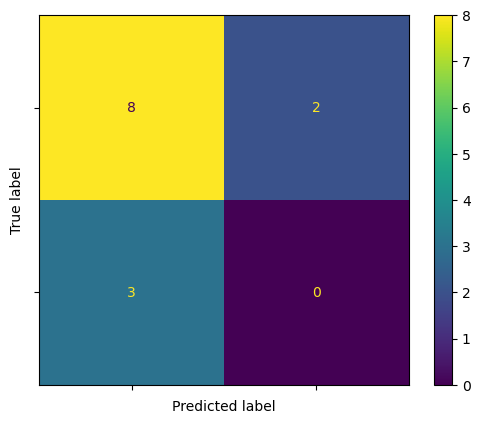

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('output4.xlsx')

data1=data[['开始吸烟年龄','是否吸烟','平均每周吸烟天数','饮酒年数', '是否饮酒','饮酒年数', '啤酒平均每次饮用量',
             '平均每天体育锻炼时间','被动吸烟天数为','不吃早餐','早餐带餐到单位', '单位食堂早餐', '在餐馆或街头吃早餐', 
             '周末在家吃早餐人数','不吃中餐', '中餐带餐到单位',  '在餐馆或街头吃中餐', '不吃晚餐', '晚餐带餐到单位', '单位食堂晚餐',
             '在餐馆或街头吃晚餐','鲜奶平均每次食用量',  '泡菜平均每次食用量', '水果平均每次食用量',  
             '动物油', '盐',  '酱类', '味精',  '食用薯类的频率', 
            '食用油炸面食的频率', '食用牛羊肉的频率','食用内脏的频率',
            '食用奶粉的频率', '食用酸奶的频率',  '食用豆腐丝等的频率',
            '食用干豆的频率',  '食用咸菜的频率',  '食用酸菜的频率',
           '食用果汁饮料的频率', '食用其他饮料的频率','婚姻状况'
]]


def dis_data(data1):
    data2 = []
    row, col = data1.shape
    for i in range(col):
        data2.append(data1[:, i])
    return data2


data_1=np.array(data1)
data2=dis_data(data_1)
data4=data2
data3=np.array(data['婚姻状况'].values)
data4.append(data3)
y=[0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1


]



from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data4,y,test_size=0.2,random_state=42)
## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42   
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels='').plot()
plt.savefig('output2.png', dpi=4000, bbox_inches='tight')  #将图片保存到磁盘


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, balanced_accuracy_score
df=classification_report(y_test, y_pred,output_dict=True)
data10=pd.DataFrame(df).transpose()
data10.to_excel('score2.xlsx')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(x_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)


from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)
print(PR_AUC)